#Question 1

#Part 1

In [167]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import roc_curve, auc

In [2]:
df = pd.read_csv('/content/drive/MyDrive/Lab_Data/anneal.csv')
df

,family,product,steel,carbon,hardness,strength,shape,thick,width,len,bore,classes
0,?,C,A,8,0,0,COIL,0.700,610.0,0,0,3
1,?,C,R,0,0,0,COIL,3.200,610.0,0,0,3
2,?,C,R,0,0,0,SHEET,0.700,1300.0,762,0,3
3,?,C,A,0,60,0,COIL,2.801,385.1,0,0,3
4,?,C,A,0,60,0,SHEET,0.801,255.0,269,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...
793,?,C,A,0,50,0,COIL,1.001,50.0,0,0,3
794,?,C,?,0,0,0,SHEET,0.699,1300.0,4880,0,3
795,?,C,A,0,0,0,COIL,0.400,609.9,0,0,3
796,?,C,A,0,0,0,SHEET,3.200,610.0,4880,0,3


In [3]:
df = df.drop('family',axis=1)
df

,product,steel,carbon,hardness,strength,shape,thick,width,len,bore,classes
0,C,A,8,0,0,COIL,0.700,610.0,0,0,3
1,C,R,0,0,0,COIL,3.200,610.0,0,0,3
2,C,R,0,0,0,SHEET,0.700,1300.0,762,0,3
3,C,A,0,60,0,COIL,2.801,385.1,0,0,3
4,C,A,0,60,0,SHEET,0.801,255.0,269,0,3
...,...,...,...,...,...,...,...,...,...,...,...
793,C,A,0,50,0,COIL,1.001,50.0,0,0,3
794,C,?,0,0,0,SHEET,0.699,1300.0,4880,0,3
795,C,A,0,0,0,COIL,0.400,609.9,0,0,3
796,C,A,0,0,0,SHEET,3.200,610.0,4880,0,3


In [4]:
df['product'].unique()

array(['C'], dtype=object)

In [5]:
df = df.drop('product',axis=1)
df

,steel,carbon,hardness,strength,shape,thick,width,len,bore,classes
0,A,8,0,0,COIL,0.700,610.0,0,0,3
1,R,0,0,0,COIL,3.200,610.0,0,0,3
2,R,0,0,0,SHEET,0.700,1300.0,762,0,3
3,A,0,60,0,COIL,2.801,385.1,0,0,3
4,A,0,60,0,SHEET,0.801,255.0,269,0,3
...,...,...,...,...,...,...,...,...,...,...
793,A,0,50,0,COIL,1.001,50.0,0,0,3
794,?,0,0,0,SHEET,0.699,1300.0,4880,0,3
795,A,0,0,0,COIL,0.400,609.9,0,0,3
796,A,0,0,0,SHEET,3.200,610.0,4880,0,3


#Part 2

In [6]:
df['steel'].mode()

0    A
Name: steel, dtype: object

In [7]:
df['steel'] = df['steel'].replace(to_replace="?",value="A")
df

,steel,carbon,hardness,strength,shape,thick,width,len,bore,classes
0,A,8,0,0,COIL,0.700,610.0,0,0,3
1,R,0,0,0,COIL,3.200,610.0,0,0,3
2,R,0,0,0,SHEET,0.700,1300.0,762,0,3
3,A,0,60,0,COIL,2.801,385.1,0,0,3
4,A,0,60,0,SHEET,0.801,255.0,269,0,3
...,...,...,...,...,...,...,...,...,...,...
793,A,0,50,0,COIL,1.001,50.0,0,0,3
794,A,0,0,0,SHEET,0.699,1300.0,4880,0,3
795,A,0,0,0,COIL,0.400,609.9,0,0,3
796,A,0,0,0,SHEET,3.200,610.0,4880,0,3


In [8]:
X = df.drop('classes',axis=1)
y = df['classes']

In [9]:
def normalize(df):
  #using The min-max feature scaling for normalizating columns individuallly whose data type is integer
  df2 = df.copy()
  for column in df2.columns:
    if df2[column].dtype != object and column != 'bore':
      df2[column] = (df2[column] - df2[column].mean())/(df2[column].std())
  return df2

X_std = normalize(X)
X_std

,steel,carbon,hardness,strength,shape,thick,width,len,bore
0,A,0.327558,-0.477159,-0.266999,COIL,-0.559242,-0.424351,-0.674719,0
1,R,-0.260996,-0.477159,-0.266999,COIL,2.342311,-0.424351,-0.674719,0
2,R,-0.260996,-0.477159,-0.266999,SHEET,-0.559242,1.280521,-0.270853,0
3,A,-0.260996,1.959785,-0.266999,COIL,1.879223,-0.980041,-0.674719,0
4,A,-0.260996,1.959785,-0.266999,SHEET,-0.442019,-1.301496,-0.532147,0
...,...,...,...,...,...,...,...,...,...
793,A,-0.260996,1.553628,-0.266999,COIL,-0.209895,-1.808016,-0.674719,0
794,A,-0.260996,-0.477159,-0.266999,SHEET,-0.560403,1.280521,1.911715,0
795,A,-0.260996,-0.477159,-0.266999,COIL,-0.907428,-0.424598,-0.674719,0
796,A,-0.260996,-0.477159,-0.266999,SHEET,2.342311,-0.424351,1.911715,0


In [10]:
X

,steel,carbon,hardness,strength,shape,thick,width,len,bore
0,A,8,0,0,COIL,0.700,610.0,0,0
1,R,0,0,0,COIL,3.200,610.0,0,0
2,R,0,0,0,SHEET,0.700,1300.0,762,0
3,A,0,60,0,COIL,2.801,385.1,0,0
4,A,0,60,0,SHEET,0.801,255.0,269,0
...,...,...,...,...,...,...,...,...,...
793,A,0,50,0,COIL,1.001,50.0,0,0
794,A,0,0,0,SHEET,0.699,1300.0,4880,0
795,A,0,0,0,COIL,0.400,609.9,0,0
796,A,0,0,0,SHEET,3.200,610.0,4880,0


In [11]:
def encode_categorical(df):
  df2 = df.copy()
  for column in df2.columns:
    if df2[column].dtype == object:
      dic = {}
      cnt = 0
      for i in range(len(df2[column])):
        if df2[column][i] not in dic:
          dic[df2[column][i]] = cnt
          cnt+=1

      df2[column] = df2[column].replace(dic)

  return df2

X_std = encode_categorical(X_std)
X_std
X = encode_categorical(X)

In [12]:
X = X.astype(float)

In [13]:
X_std

,steel,carbon,hardness,strength,shape,thick,width,len,bore
0,0,0.327558,-0.477159,-0.266999,0,-0.559242,-0.424351,-0.674719,0
1,1,-0.260996,-0.477159,-0.266999,0,2.342311,-0.424351,-0.674719,0
2,1,-0.260996,-0.477159,-0.266999,1,-0.559242,1.280521,-0.270853,0
3,0,-0.260996,1.959785,-0.266999,0,1.879223,-0.980041,-0.674719,0
4,0,-0.260996,1.959785,-0.266999,1,-0.442019,-1.301496,-0.532147,0
...,...,...,...,...,...,...,...,...,...
793,0,-0.260996,1.553628,-0.266999,0,-0.209895,-1.808016,-0.674719,0
794,0,-0.260996,-0.477159,-0.266999,1,-0.560403,1.280521,1.911715,0
795,0,-0.260996,-0.477159,-0.266999,0,-0.907428,-0.424598,-0.674719,0
796,0,-0.260996,-0.477159,-0.266999,1,2.342311,-0.424351,1.911715,0


In [14]:
X

,steel,carbon,hardness,strength,shape,thick,width,len,bore
0,0.0,8.0,0.0,0.0,0.0,0.700,610.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,3.200,610.0,0.0,0.0
2,1.0,0.0,0.0,0.0,1.0,0.700,1300.0,762.0,0.0
3,0.0,0.0,60.0,0.0,0.0,2.801,385.1,0.0,0.0
4,0.0,0.0,60.0,0.0,1.0,0.801,255.0,269.0,0.0
...,...,...,...,...,...,...,...,...,...
793,0.0,0.0,50.0,0.0,0.0,1.001,50.0,0.0,0.0
794,0.0,0.0,0.0,0.0,1.0,0.699,1300.0,4880.0,0.0
795,0.0,0.0,0.0,0.0,0.0,0.400,609.9,0.0,0.0
796,0.0,0.0,0.0,0.0,1.0,3.200,610.0,4880.0,0.0


In [15]:
y = y.replace(to_replace = "U",value=int(6))
y = y.astype(int)
y.dtype

dtype('int64')

In [16]:
y.unique()

array([3, 6, 1, 5, 2])

In [17]:
X_std['bore'].unique()

array([  0, 500, 600])

In [18]:
X_train_std, X_test_std, y_train_std, y_test_std = train_test_split(X_std, y, test_size=0.35)

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35)

#Part 3

#Support Vector Machine

Standardized data

In [20]:
clf = svm.SVC()
clf.fit(X_train_std.to_numpy(), y_train_std.to_numpy())
y_pred = clf.predict(X_test_std.to_numpy())
clf.score(X_test_std,y_test_std.to_numpy())

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


0.7321428571428571

In [21]:
kfold_validation = KFold(5)
results_score = cross_val_score(clf,X_std.to_numpy(),y.to_numpy(),cv=kfold_validation)
print("accuracy scores:", results_score)
print("average Accuracy score:", np.mean(results_score))

accuracy scores: [0.75       0.76875    0.7375     0.77987421 0.77358491]
average Accuracy score: 0.7619418238993712


In [22]:
X_ax = [1,2,3,4,5]

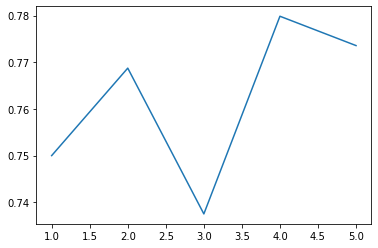

In [23]:
plt.plot(X_ax,results_score)

Without Standardized Data

In [24]:
clf_nstd = svm.SVC()
clf_nstd.fit(X_train.to_numpy(), y_train.to_numpy())
y_pred_nstd = clf_nstd.predict(X_test.to_numpy())
clf_nstd.score(X_test.to_numpy(),y_test.to_numpy())

0.75

In [25]:
kfold_validation = KFold(5)
results_score_nstd = cross_val_score(clf_nstd,X.to_numpy(),y.to_numpy(),cv=kfold_validation)
print("accuracy scores:", results_score_nstd)
print("average Accuracy score:", np.mean(results_score_nstd))

accuracy scores: [0.75       0.76875    0.7375     0.77987421 0.77358491]
average Accuracy score: 0.7619418238993712


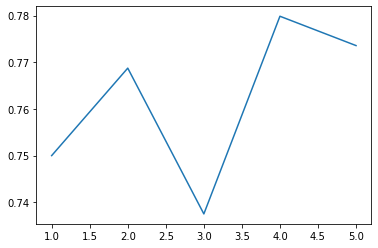

In [26]:
plt.plot(X_ax,results_score_nstd)

#Decision  Tree Classifier

Standardized data

In [27]:
clf2 = DecisionTreeClassifier()
clf2.fit(X_train_std, y_train_std)
y_pred2 = clf2.predict(X_test_std)
clf2.score(X_test_std,y_test_std)

0.8857142857142857

In [28]:
kfold_validation = KFold(5)
results_score2 = cross_val_score(clf2,X_std,y,cv=kfold_validation)
print("accuracy scores:", results_score2)
print("average Accuracy score:", np.mean(results_score2))

accuracy scores: [0.875      0.9375     0.925      0.89308176 0.87421384]
average Accuracy score: 0.9009591194968554


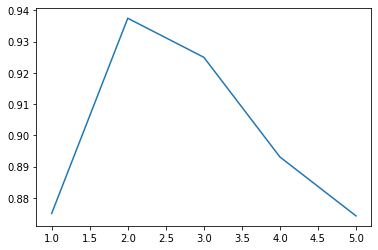

In [29]:
plt.plot(X_ax,results_score2)

Without Standardized Data

In [30]:
clf2_nstd = DecisionTreeClassifier()
clf2_nstd.fit(X_train, y_train)
y_pred2_nstd = clf2.predict(X_test)
clf2_nstd.score(X_test,y_test)

0.8785714285714286

In [31]:
kfold_validation = KFold(5)
results_score2_nstd = cross_val_score(clf2_nstd,X,y,cv=kfold_validation,scoring='r2')
print("accuracy scores:", results_score2_nstd)
print("average Accuracy score:", np.mean(results_score2_nstd))

accuracy scores: [0.49175824 0.72590628 0.80642039 0.58562358 0.50981502]
average Accuracy score: 0.6239047025560602


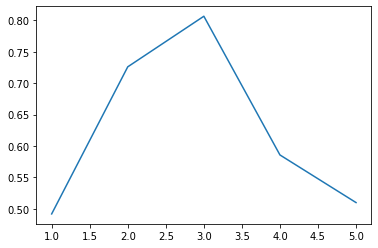

In [32]:
plt.plot(X_ax,results_score2_nstd)

#Part 4

In [33]:
def covar(data):
  N = data.shape[0]
  n_dim = data.shape[1]
  cov = np.zeros((n_dim, n_dim))

  avg = []
  for i in range(n_dim):
      avg.append(sum([d[i] for d in data]) / N)

  for i in range(n_dim):
      for j in range(n_dim):
          var = 0
          for d in data:
              var += (d[i] - avg[i]) * (d[j] - avg[j])
          var /= (N - 1)
          cov[i, j] = var

  return cov

In [34]:
def PCA(X, n_components,*,plot=False):
  X1 = X.copy()
  X_meaned = X1 - np.mean(X1,axis=0)
  cov_mat = covar(X_meaned)
  eigen_values , eigen_vectors = np.linalg.eigh(cov_mat)
  sorted_index = np.argsort(eigen_values)[::-1]
  sorted_eigenvalue = eigen_values[sorted_index]
  sorted_eigenvectors = eigen_vectors[:,sorted_index]
  eigenvector_subset = sorted_eigenvectors[:,0:n_components]
  X_reduced = np.dot(eigenvector_subset.transpose() , X_meaned.transpose() ).transpose()
  if(plot==True):
    mu = np.mean(X1,axis=0)
    plt.scatter(X[:,1], X[:,2], color='b')
    plt.arrow(mu[0], mu[1], eigen_vectors[0,0], eigen_vectors[0,1], color='r', width=0.03)
    plt.arrow(mu[0], mu[1], eigen_vectors[1,0], eigen_vectors[1,1], color='g', width=0.03)
    plt.show()

  return X_reduced

#Part 5

Without Standardized Data

<BarContainer object of 10 artists>

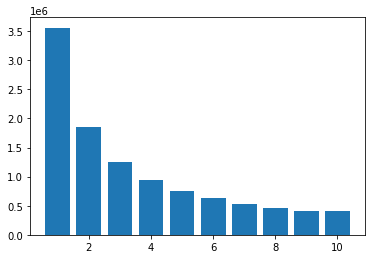

In [35]:
y_axes = []
X_axes = []

for n in range(1,11):
  X_temp = PCA(X.to_numpy(),n)
  X_axes.append(n)
  y_axes.append(np.var(X_temp))

plt.bar(X_axes,y_axes)

Standardized Data

<BarContainer object of 10 artists>

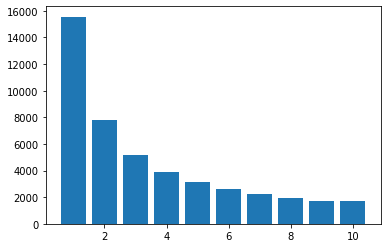

In [36]:
y_axes_std = []
X_axes_std = []

for n in range(1,11):
  X_temp = PCA(X_std.to_numpy(),n)
  X_axes_std.append(n)
  y_axes_std.append(np.var(X_temp))

plt.bar(X_axes_std,y_axes_std)

#Part 6

Standardized Data

In [37]:
X_std_pca = PCA(X_std.to_numpy(),9)

In [38]:
X_pca_std_train = PCA(X_train_std.to_numpy(),9)
X_pca_std_test = PCA(X_test_std.to_numpy(),9)

In [39]:
clf_pca = svm.SVC()
clf_pca.fit(X_pca_std_train, y_train_std)
y_pred_pca = clf_pca.predict(X_pca_std_test)
clf_pca.score(X_pca_std_test,y_test_std)

0.7321428571428571

In [40]:
kfold_validation = KFold(5)
results_score_std_pca = cross_val_score(clf_pca,X_std_pca,y,cv=kfold_validation)
print("accuracy scores:", results_score_std_pca)
print("average Accuracy score:", np.mean(results_score_std_pca))

accuracy scores: [0.75       0.76875    0.7375     0.77987421 0.77358491]
average Accuracy score: 0.7619418238993712


In [41]:
clf2_pca = DecisionTreeClassifier()
clf2_pca.fit(X_pca_std_train, y_train_std)
y_pred2_pca = clf2_pca.predict(X_pca_std_test)
clf2_pca.score(X_pca_std_test,y_test_std)

0.7

In [42]:
kfold_validation = KFold(5)
results_score2_std_pca = cross_val_score(clf2_pca,X_std_pca,y,cv=kfold_validation)
print("accuracy scores:", results_score2_std_pca)
print("average Accuracy score:", np.mean(results_score2_std_pca))

accuracy scores: [0.8625     0.88125    0.85625    0.8490566  0.86163522]
average Accuracy score: 0.862138364779874


Without Standardized Data

In [43]:
X_pca = PCA(X.to_numpy(),9)
X_train_pca = PCA(X_train.to_numpy(),9)
X_test_pca = PCA(X_test.to_numpy(),9)

In [44]:
clf_pca_nstd = svm.SVC()
clf_pca_nstd.fit(X_train_pca, y_train)
y_pred_pca_nstd = clf_pca_nstd.predict(X_test_pca)
clf_pca_nstd.score(X_test_pca,y_test)

0.75

In [45]:
kfold_validation = KFold(5)
results_score_nstd_pca = cross_val_score(clf_pca_nstd,X_pca,y,cv=kfold_validation)
print("accuracy scores:", results_score_nstd_pca)
print("average Accuracy score:", np.mean(results_score_nstd_pca))

accuracy scores: [0.75       0.76875    0.7375     0.77987421 0.77358491]
average Accuracy score: 0.7619418238993712


In [46]:
clf2_pca_nstd = DecisionTreeClassifier()
clf2_pca_nstd.fit(X_train_pca, y_train)
y_pred2_pca_nstd = clf2_pca_nstd.predict(X_test_pca)
clf2_pca_nstd.score(X_test_pca,y_test)

0.525

In [47]:
kfold_validation = KFold(5)
results_score2_nstd_pca = cross_val_score(clf2_pca_nstd,X_pca,y,cv=kfold_validation)
print("accuracy scores:", results_score2_nstd_pca)
print("average Accuracy score:", np.mean(results_score2_nstd_pca))

accuracy scores: [0.875      0.9375     0.89375    0.88679245 0.86163522]
average Accuracy score: 0.8909355345911949


#Part 7

Standardized Data

In [51]:
print("SVM Accuracy Score:",accuracy_score(y_test_std,y_pred_pca))

SVM Accuracy Score: 0.7321428571428571


In [52]:
print("Decision Tree Accuracy Score:",accuracy_score(y_test_std,y_pred2_pca))

Decision Tree Accuracy Score: 0.7


In [56]:
print("SVM Sensitivity:", recall_score(y_test_std,y_pred_pca,average='weighted'))

SVM Sensitivity: 0.7321428571428571


In [57]:
print("Decision Tree Sensitivity:", recall_score(y_test_std,y_pred2_pca,average='weighted'))

Decision Tree Sensitivity: 0.7


In [60]:
print("F1-Score SVM:", f1_score(y_test_std,y_pred_pca,average='weighted'))

F1-Score SVM: 0.6189248895434462


In [61]:
print("F1-Score Decision Tree:", f1_score(y_test_std,y_pred2_pca,average='weighted'))

F1-Score Decision Tree: 0.6291829586184426


Without Standardized Data

In [62]:
print("SVM Accuracy Score:",accuracy_score(y_test,y_pred_pca_nstd))

SVM Accuracy Score: 0.75


In [63]:
print("Decision Tree Accuracy Score:",accuracy_score(y_test,y_pred2_pca_nstd))

SVM Accuracy Score: 0.525


In [65]:
print("SVM Sensitivity:", recall_score(y_test,y_pred_pca_nstd,average='weighted'))

SVM Sensitivity: 0.75


In [66]:
print("Decision Tree Sensitivity:", recall_score(y_test,y_pred2_pca_nstd,average='weighted'))

SVM Sensitivity: 0.525


In [67]:
print("F1-Score SVM:", f1_score(y_test,y_pred_pca_nstd,average='weighted'))

F1-Score SVM: 0.6428571428571429


In [68]:
print("F1-Score Decision Tree:", f1_score(y_test,y_pred2_pca_nstd,average='weighted'))

F1-Score Decision Tree: 0.5428837346008697


#Question 2

In [117]:
df2 = pd.read_csv('/content/drive/MyDrive/Lab_Data/wine.csv')
df2

,class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [118]:
X = df2.drop('class',axis=1)
y = df2['class']

In [119]:
X = normalize(X)
X

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1.514341,-0.560668,0.231400,-1.166303,1.908522,0.806722,1.031908,-0.657708,1.221438,0.251009,0.361158,1.842721,1.010159
1,0.245597,-0.498009,-0.825667,-2.483841,0.018094,0.567048,0.731565,-0.818411,-0.543189,-0.292496,0.404908,1.110317,0.962526
2,0.196325,0.021172,1.106214,-0.267982,0.088110,0.806722,1.212114,-0.497005,2.129959,0.268263,0.317409,0.786369,1.391224
3,1.686791,-0.345835,0.486554,-0.806975,0.928300,2.484437,1.462399,-0.979113,1.029251,1.182732,-0.426341,1.180741,2.328007
4,0.294868,0.227053,1.835226,0.450674,1.278379,0.806722,0.661485,0.226158,0.400275,-0.318377,0.361158,0.448336,-0.037767
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,0.873810,2.966176,0.304301,0.300954,-0.331985,-0.982841,-1.420891,1.270726,-0.927563,1.139596,-1.388840,-1.227742,-0.021890
174,0.491955,1.408636,0.413653,1.049555,0.158126,-0.791103,-1.280731,0.547563,-0.316058,0.967055,-1.126341,-1.481267,0.009866
175,0.331822,1.739837,-0.388260,0.151234,1.418411,-1.126646,-1.340800,0.547563,-0.420888,2.217979,-1.607590,-1.481267,0.279786
176,0.208643,0.227053,0.012696,0.151234,1.418411,-1.030776,-1.350811,1.351077,-0.228701,1.829761,-1.563840,-1.396759,0.295664


In [120]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#Part 1

In [121]:
class LDA:
    def __init__(self, n_components):
        self.n_components = n_components
        self.linear_discriminants = None

    def fit(self, X, y):
        n_features = X.shape[1]
        class_labels = np.unique(y)

        # Within class scatter matrix:
        # SW = sum((X_c - mean_X_c)^2 )

        # Between class scatter:
        # SB = sum( n_c * (mean_X_c - mean_overall)^2 )

        mean_overall = np.mean(X, axis=0)
        SW = np.zeros((n_features, n_features))
        SB = np.zeros((n_features, n_features))
        for c in class_labels:
            X_c = X[y == c]
            mean_c = np.mean(X_c, axis=0)
            # (4, n_c) * (n_c, 4) = (4,4) -> transpose
            SW += (X_c - mean_c).T.dot((X_c - mean_c))

            # (4, 1) * (1, 4) = (4,4) -> reshape
            n_c = X_c.shape[0]
            mean_diff = (mean_c - mean_overall).reshape(n_features, 1)
            SB += n_c * (mean_diff).dot(mean_diff.T)

        # Determine SW^-1 * SB
        A = np.linalg.inv(SW).dot(SB)
        # Get eigenvalues and eigenvectors of SW^-1 * SB
        eigenvalues, eigenvectors = np.linalg.eig(A)
        # -> eigenvector v = [:,i] column vector, transpose for easier calculations
        # sort eigenvalues high to low
        eigenvectors = eigenvectors.T
        idxs = np.argsort(abs(eigenvalues))[::-1]
        eigenvalues = eigenvalues[idxs]
        eigenvectors = eigenvectors[idxs]
        # store first n eigenvectors
        self.linear_discriminants = eigenvectors[0 : self.n_components]

    def transform(self, X):
        # project data
        return np.dot(X, self.linear_discriminants.T)

In [140]:
lda = LDA(n_components=8)
lda.fit(X_train.to_numpy(),y_train)
X_train_lda = lda.transform(X_train)
X_train_lda.shape

(124, 8)

In [141]:
X_train_lda = np.real(X_train_lda)
X_train_lda.shape

(124, 8)

In [142]:
lda.fit(X_test.to_numpy(),y_test)
X_test_lda = lda.transform(X_test)
X_test_lda.shape

(54, 8)

In [143]:
X_test_lda = np.real(X_test_lda)
X_test_lda.shape

(54, 8)

In [144]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train_lda, y_train)
y_pred = dtc.predict(X_test_lda)
dtc.score(X_test_lda,y_test)

1.0

In [145]:
sup_vc = svm.SVC()
sup_vc.fit(X_train_lda, y_train)
y_pred_svc = sup_vc.predict(X_test_lda)
sup_vc.score(X_test_lda,y_test)

1.0

#Part 3

In [150]:
X_train_pca = PCA(X_train.to_numpy(),8)
X_train_pca.shape

(124, 8)

In [152]:
X_test_pca = PCA(X_test.to_numpy(),8)
X_test_pca.shape

(54, 8)

In [153]:
dtc_pca = DecisionTreeClassifier()
dtc_pca.fit(X_train_pca, y_train)
y_pred_dtc = dtc_pca.predict(X_test_pca)
dtc_pca.score(X_test_pca,y_test)

0.9259259259259259

In [154]:
sup_vc_pca = svm.SVC()
sup_vc_pca.fit(X_train_pca, y_train)
y_pred_svc_pca = sup_vc_pca.predict(X_test_pca)
sup_vc_pca.score(X_test_pca,y_test)

0.9814814814814815

#Part 5

In [155]:
def cross_validation(model,X,y,*,folds=5):
  for i in range(0,folds):
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 1/folds)
    model.fit(X_train, y_train) 
    print(model.score(X_test, y_test))

In [166]:
lda_clf = LinearDiscriminantAnalysis()
cross_validation(lda_clf,X,y)

1.0
0.9722222222222222
0.9444444444444444
1.0
1.0
